# Pandas
Manipolazioni di grandi quantità di dati per python

Link Utili:
- [Guida su freeCodeCamp](https://www.freecodecamp.org/news/the-ultimate-guide-to-the-pandas-library-for-data-science-in-python/) (in inglese)
- Raccolte di dataset scaricabili gratuitamente:
  - [https://www.tableau.com](https://www.tableau.com/learn/articles/free-public-data-sets)
  - [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)

In [28]:
import pandas as pd
import numpy as np


Riporto qui sotto a grandi linee gli esempi fatti a lezione che non sono presenti nell'altro notebook ([pandas_notebook](./pandas_notebook.ipynb))


In [36]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/pg-88/IFOA_ML_AI/main/Risorse/dataset/titanic3.csv")
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,2250",NaN,C,NaN,NaN,NaN


In [37]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
survived,1309.0,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0
sibsp,1309.0,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,0.385027,0.865560,0.0,0.0,0.0,0.0,9.0
body,121.0,160.809917,97.696922,1.0,72.0,155.0,256.0,328.0


Controllo i tipi di dato per vedere se c'è qualcosa da sistemare

In [38]:
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Rimuovo temporaneamente le Series che danno problemi e le assegno a un df temporaneo


In [39]:
da_correggere = titanic_df[["age", "fare"]]
da_correggere
titanic_df = titanic_df.drop(["age", "fare"], axis=1)

In [40]:
titanic_df

,pclass,survived,name,sex,sibsp,parch,ticket,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670,NaN,C,NaN,NaN,NaN


In [34]:
da_correggere.apply(lambda x : x.str.replace(",", ".")).astype('float16')
da_correggere # NON VIENE MODIFICATO SE NON LO RIASSEGNO

,age,fare
0,29,"211,3375"
1,"0,9167","151,5500"
2,2,"151,5500"
3,30,"151,5500"
4,25,"151,5500"
...,...,...
1304,"14,5","14,4542"
1305,NaN,"14,4542"
1306,"26,5","7,2250"
1307,27,"7,2250"


In [41]:
da_correggere = da_correggere.apply(lambda x : x.str.replace(",", ".")).astype('float16')


In [42]:
titanic_df.insert(loc=3, value=da_correggere["fare"], column="fare")


In [43]:
titanic_df["age"] = da_correggere["age"]

In [44]:
titanic_df

,pclass,survived,name,fare,sex,sibsp,parch,ticket,cabin,embarked,boat,body,home.dest,age
0,1,1,"Allen, Miss. Elisabeth Walton",211.375000,female,0,0,24160,B5,S,2,NaN,"St Louis, MO",29.000000
1,1,1,"Allison, Master. Hudson Trevor",151.500000,male,1,2,113781,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.916504
2,1,0,"Allison, Miss. Helen Loraine",151.500000,female,1,2,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",151.500000,male,1,2,113781,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.500000,female,1,2,113781,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.453125,female,1,0,2665,NaN,C,NaN,328.0,NaN,14.500000
1305,3,0,"Zabour, Miss. Thamine",14.453125,female,1,0,2665,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",7.226562,male,0,0,2656,NaN,C,NaN,304.0,NaN,26.500000
1307,3,0,"Zakarian, Mr. Ortin",7.226562,male,0,0,2670,NaN,C,NaN,NaN,NaN,27.000000


posso modificare il tipo di altre columns per risparmiare spazio

In [54]:
for col in titanic_df.columns:
    if titanic_df[col].dtype == 'int64':
        print(titanic_df[col].dtype)
        titanic_df[col] = titanic_df[col].astype('int8')

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int8   
 1   survived   1309 non-null   int8   
 2   name       1309 non-null   object 
 3   fare       1308 non-null   float16
 4   sex        1309 non-null   object 
 5   sibsp      1309 non-null   int8   
 6   parch      1309 non-null   int8   
 7   ticket     1309 non-null   object 
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
 13  age        1046 non-null   float16
dtypes: float16(2), float64(1), int8(4), object(7)
memory usage: 92.2+ KB


Controllare il `memory usage: ### KB` prima e dopo l'operazione appena fatta, nel mio caso, siamo passati da

`memory usage: 143.3+ KB`

a

`memory usage: 92.2+ KB`

In [60]:
titanic_df.loc[0:5, ["fare", "pclass", "age"]] # prime 6 righe con tariffa, classe, età 
filtro = titanic_df["name"].str.contains("Walton") # filtro è una series di booleani
titanic_df.loc[filtro, ["name" ,"fare", "pclass", "age"]] # filtro dentro il loc più colonne da recuperare 

,name,fare,pclass,age
0,"Allen, Miss. Elisabeth Walton",211.3750,1,29.0
27,"Bishop, Mrs. Dickinson H (Helen Walton)",91.0625,1,19.0
238,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",211.3750,1,43.0


In [61]:
## iloc usa solo gli indici

titanic_df.iloc[-1] # ultima riga

pclass                        3
survived                      0
name         Zimmerman, Mr. Leo
fare                      7.875
sex                        male
sibsp                         0
parch                         0
ticket                   315082
cabin                       NaN
embarked                      S
boat                        NaN
body                        NaN
home.dest                   NaN
age                        29.0
Name: 1308, dtype: object

In [74]:
titanic_df["age"].value_counts()

eta = titanic_df["age"]

eta.index = titanic_df["name"]

In [75]:
eta.head()

name
Allen, Miss. Elisabeth Walton                      29.000000
Allison, Master. Hudson Trevor                      0.916504
Allison, Miss. Helen Loraine                        2.000000
Allison, Mr. Hudson Joshua Creighton               30.000000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.000000
Name: age, dtype: float16

In [76]:
eta.value_counts()

24.000000    47
22.000000    43
21.000000    41
30.000000    40
18.000000    39
             ..
0.333252      1
22.500000     1
70.500000     1
0.666504      1
26.500000     1
Name: age, Length: 98, dtype: int64

<Axes: >

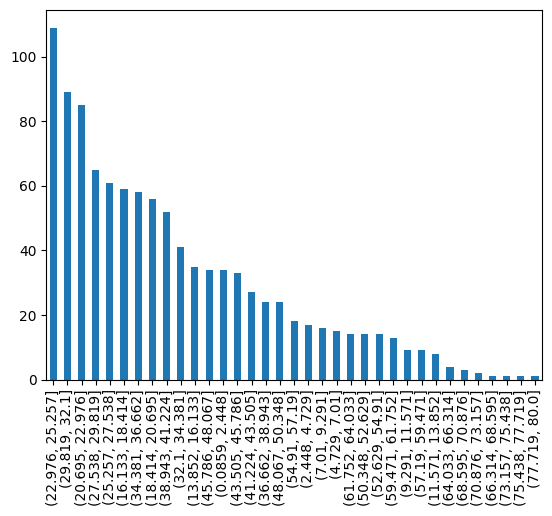

In [81]:
eta.value_counts(bins=35).plot(kind='bar')

Frequenze di età dei sopravvissuti

<class 'pandas.core.series.Series'>
Int64Index: 500 entries, 0 to 1300
Series name: age
Non-Null Count  Dtype  
--------------  -----  
427 non-null    float16
dtypes: float16(1)
memory usage: 4.9 KB


<Axes: >

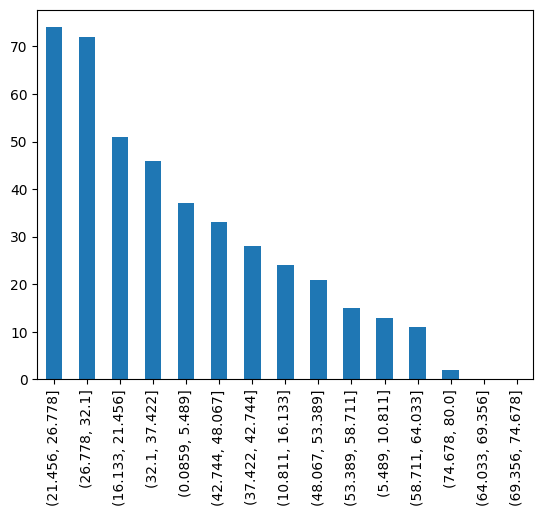

In [114]:
eta_survived = titanic_df.loc[titanic_df["survived"] == 1]
eta_survived = eta_survived["age"]
eta_survived.info()
eta_survived.mean()
eta_survived.value_counts(bins=15).plot(kind='bar')